In [1]:
%pylab inline
import px4tools
import pandas

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 3

Populating the interactive namespace from numpy and matplotlib
attempting to monkey patch pandas timedelta series plotting
monkey patch suceeded


In [2]:
d = px4tools.read_ulog2('./ulog/22_03_28.ulg')

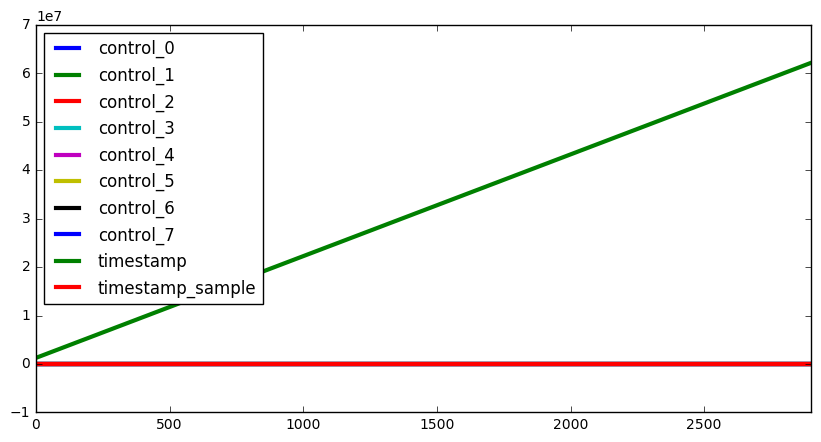

In [3]:
d.actuator_controls_0.id_0.plot()

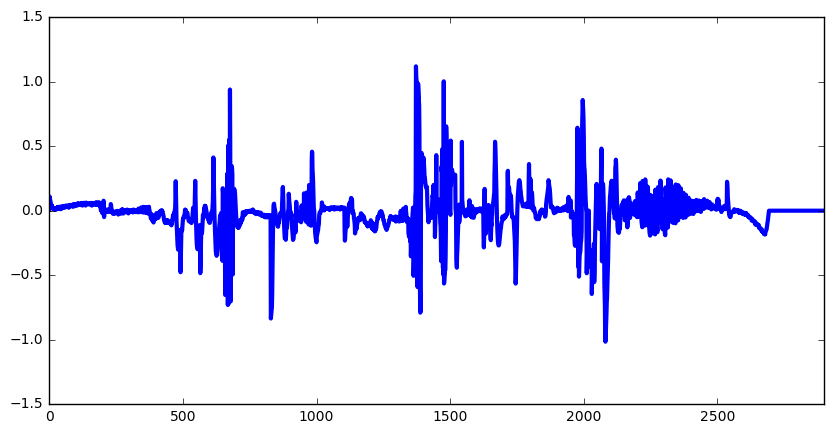

In [4]:
d.actuator_controls_0.id_0.con

In [ ]:
data = px4tools.read_ulog2('./ulog/22_03_28.ulg')

In [ ]:

d = Structure()
for msg in data.keys():
    d[msg] = Structure()
    for multi_id in data[msg].keys():
        d[msg][multi_id] = Structure()
        for field in data[msg][multi_id]:
            field_new = field.replace('[', '_').replace(']', '')
            d[msg][multi_id][field_new] = data[msg][multi_id][field]

In [ ]:
d.actuator_controls_0.id_0.control_0.plot()

In [ ]:
type(d)

In [ ]:
d.actuator_c

Resample at 0.1 seconds and concatenate all messages into one pandas dataframe. Select time range from 1 sec to 59 sec.

In [ ]:
m = log.concat(dt=0.1)['1 s': '59 s']

In [ ]:
m.t_vehicle_attitude_0__f_pitchspeed.plot()

A list of all of the available topis can be found using keys().

In [ ]:
m.keys()

Autocomplete works as if it were a class member and you can plot using the member function of the pandas series.

In [ ]:
m.t_actuator_controls_0_0__f_control_0_['1 s':'10 s'].plot()

In [ ]:
m.t_actuator_controls_0_0__f_control_0_.plot()
plt.grid()

In [ ]:
px4tools.ulog.plot_altitude(m, True)

In [ ]:
m = px4tools.compute_data(m)
px4tools.ulog.estimator_analysis(m)